# Embry Riddle Aeronatical University and NNSS.

Optical absorption spectroscopy is an important characterization of materials for applications such as solar energy generation. The purpose of the study is to build an ensemble neural network for predicting metal oxide spectrograms from images of metal oxide that have been scanned. With an ensemble network, several models are trained to produce a variety of predictions. By averaging these predictions, an even more accurate prediction can be made. Furthermore, uncertainty quantification will be applied by measuring the variance between the predictions, allowing more useful statistical analysis to be done such as producing confidence intervals to determine how accurate the results are. The study is done through a quantitative empirical research method. The research is a collaboration with Nevada National Security Site.

### Results Summery:

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from tqdm import tqdm
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import *

import tensorflow as tf
from tensorflow.keras.models import Model

from matplotlib.pyplot import figure
from functions import ensemble_label, mse, mae, rmse, uq

In [2]:
dataset = np.load("dataset/metal_oxide.npz")

In [3]:
base = tf.keras.models.load_model('models/base.h5')
models = [tf.keras.models.load_model(f"models/{index}.h5") for index in range(1,6)]

### Ensembled Statistics

In [4]:
images = dataset["training_images"][:100000]
labels = dataset["training_labels"][:100000]

In [ ]:
print(f'Mean squared error {mse(models,images,labels)}')

In [ ]:
print(f'Mean absolute error: {mae(models,images,labels)}')

In [ ]:
print(f'Root of the mean squared error: {rmse(models,images,labels)}')

In [9]:
image = 8

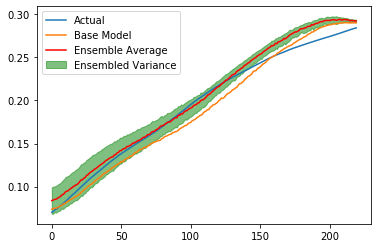

In [10]:
mean, deviation = uq(models, dataset["training_images"][image])

plt.plot(dataset["training_labels"][image], label="Actual")
plt.plot(base(dataset["training_images"][image].reshape(1, 64, 64, 3))[0].numpy(), label="Base Model")
plt.plot(ensemble_label(models,dataset["training_images"][image]), label="Ensemble Average", color="red")
plt.fill_between(range(len(mean)), mean - deviation, mean + deviation, label="Ensembled Variance",color = "green",alpha=0.5)
plt.legend()
plt.show() 

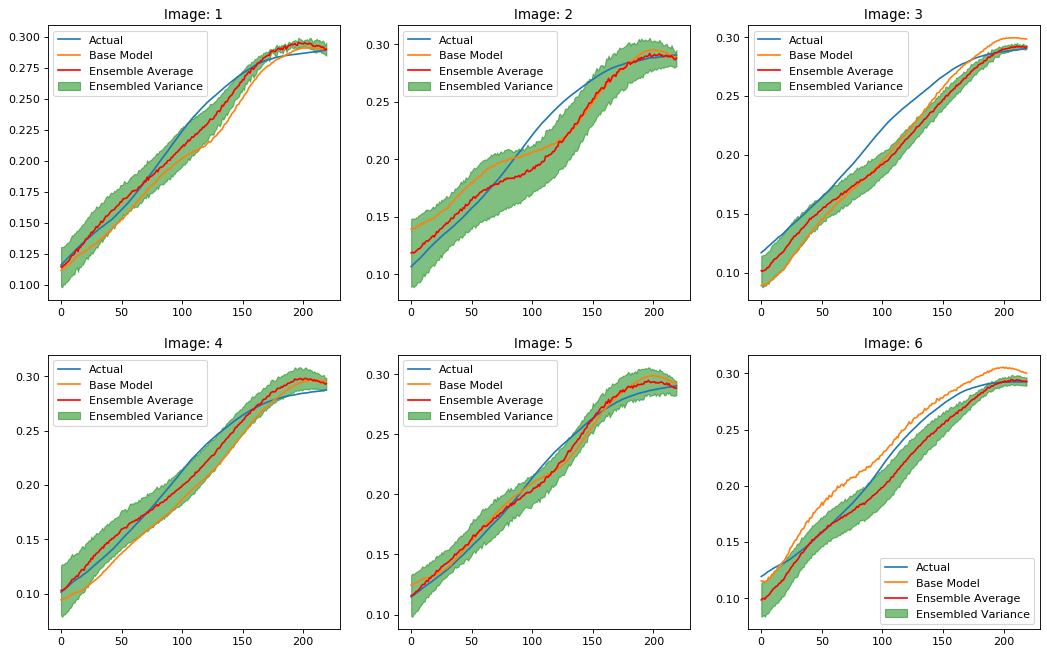

In [11]:
figure(figsize=(16, 10), dpi=80)
for index in range(1,7):

    mean, deviation = uq(models, dataset["training_images"][index])

    plt.subplot(2, 3, index)
    plt.title(f"Image: {index}")
    plt.plot(dataset["training_labels"][index], label="Actual")
    plt.plot(base(dataset["training_images"][index].reshape(1, 64, 64, 3))[0].numpy(), label="Base Model")
    plt.plot(ensemble_label(models,dataset["training_images"][index]), label="Ensemble Average", color="red")
    plt.fill_between(range(len(mean)), mean - deviation, mean + deviation, label="Ensembled Variance",color = "green",alpha=0.5)
    plt.legend()


plt.show() 